In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from steinhardt.steinhardt import *
from steinhardt.data import *
from steinhardt.plotting import *

plt.style.use('plot.mplstyle')

In [2]:
fausto_steinhardt, fausto_dens = process_water_structures('testing')

In [3]:
mda_steinhardt, mda_dens = process_mda_structures(all_runs=False,run=2)

In [4]:
desc_to_plot = ['av_q4','av_q6','av_q8']

desc_idx, feature_names = get_desc_idx_and_names(desc_to_plot)

In [6]:
# %config InlineBackend.figure_format = 'retina'
# fig, axs = plt.subplots(2, len(desc_idx), figsize=(15, 5),sharex=True)

# mda_colors = ['#caf0f8','#ade8f4', '#0096c7','#03045e']
# mda_labels = ['Ice Ih','Shears 1-10', 'Shears 10-100', 'MDA']

# # fausto_colors = ['#b5e48c','#76c893','#34a0a4']
# fausto_labels = ['HDA','LDA','Liquid']
# line_styles = ['solid','dashed','dotted']


# for j in range(len(desc_idx)):
#     for i, label in enumerate(mda_steinhardt.keys()):
#         sns.kdeplot(mda_steinhardt[label][:,desc_idx[j]], ax=axs[0][j], label=mda_labels[i], color=mda_colors[i],fill=True, alpha=0.5,linewidth=2)
    
# for j in range(len(desc_idx)):
#     for i, label in enumerate(fausto_steinhardt.keys()):
#         sns.kdeplot(fausto_steinhardt[label][:,desc_idx[j]], ax=axs[1][j], label=fausto_labels[i], color='black',linestyle=line_styles[i],linewidth=2)

# axs[0][len(desc_idx)-1].legend(loc='upper left', bbox_to_anchor=(1, 1.1), ncol=1)
# axs[1][len(desc_idx)-1].legend(loc='upper left', bbox_to_anchor=(1, 0.9), ncol=1)

# # reduce the space between subplots
# plt.subplots_adjust(wspace=0.1, hspace=0.1)

# # remove the y ticks
# for j in range(1,len(desc_idx)):
#     axs[0][j].set_yticks([])
#     axs[1][j].set_yticks([])
#     axs[0][j].set_ylabel('')
#     axs[1][j].set_ylabel('')

# for i in range(len(desc_idx)):
#     axs[1][i].set_xlabel(desc_to_plot_label_mapping[feature_names[i]], fontsize=15);\

# # increase y-axis label size
# axs[0][0].set_ylabel('Probability Density', fontsize=12)
# axs[1][0].set_ylabel('Probability Density', fontsize=12)

# plt.savefig(f'../figures/qbar4-6-8_distributions.pdf', dpi=300, bbox_inches='tight')

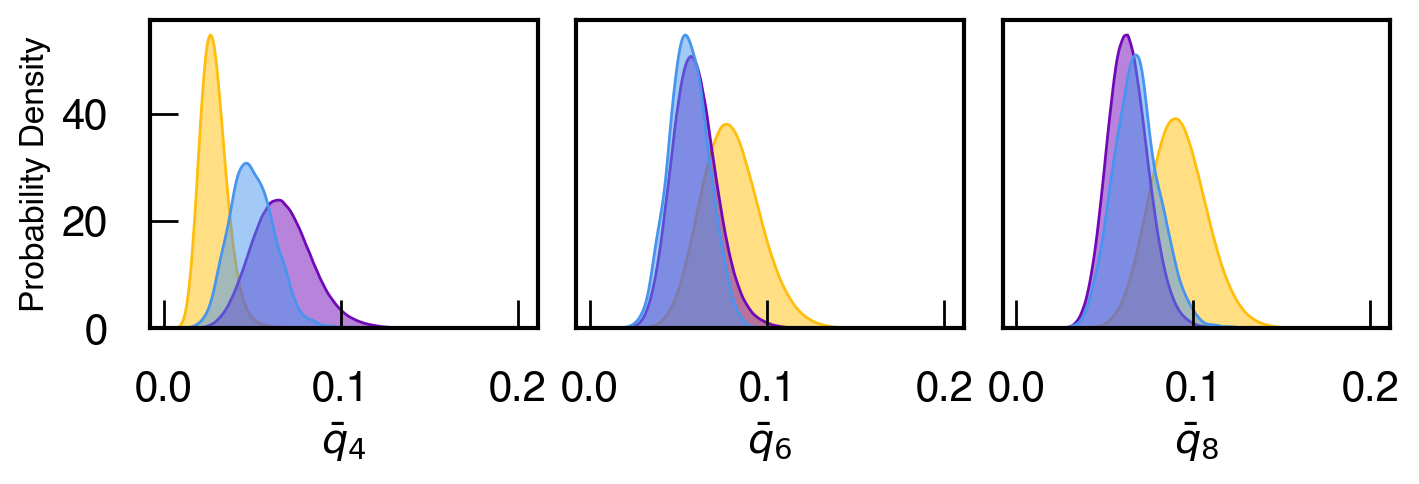

In [9]:
%config InlineBackend.figure_format = 'retina'
fig, axs = plt.subplots(1, len(desc_idx), figsize=(8, 2),sharex=True)

# mda_colors = ['#ffbe0b']
mda_colors = ['#4895ef']
mda_labels = [ 'MDA']

fausto_colors = ['#ffbe0b','#7209b7','#ff006e']
# fausto_colors = ['#3a86ff','#8338ec','#ff006e']
fausto_labels = ['HDA','LDA','High-T Liquid']

for j in range(len(desc_idx)):
    for i, label in enumerate(fausto_steinhardt.keys()):
        if label == 'liquid':
            continue
        sns.kdeplot(fausto_steinhardt[label][:,desc_idx[j]], ax=axs[j], label=fausto_labels[i], color=fausto_colors[i],linewidth=1, fill=True, alpha=0.5)
        
for j in range(len(desc_idx)):
    sns.kdeplot(mda_steinhardt['mda'][:,desc_idx[j]], ax=axs[j], label=mda_labels[0], color=mda_colors[0],linewidth=1, fill=True, alpha=0.5)

# axs[len(desc_idx)-1].legend(loc='upper left', bbox_to_anchor=(1, 0.9), ncol=1)
# reduce the space between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# remove the y ticks
for j in range(1,len(desc_idx)):
    axs[j].set_yticks([])
    axs[j].set_ylabel('')

for i in range(len(desc_idx)):
    axs[i].set_xlabel(desc_to_plot_label_mapping[feature_names[i]], fontsize=15);

# increase y-axis label size
axs[0].set_ylabel('Probability Density', fontsize=12)
axs[0].set_ylabel('Probability Density', fontsize=12)

# plt.savefig(f'../figures/qbar4-6-8_distributions_newColors.svg', dpi=300, bbox_inches='tight')
plt.savefig(f"../figures/paper/steinhardt_dists_NoLiquid.svg", bbox_inches="tight", dpi=300)

In [6]:
p = 1
supercooled_steinhardt, supercooled_dens, temps = process_supercooled_structures(pressure=p)

Text(0.5, 0.98, 'Pressure = 0.0001 GPa')

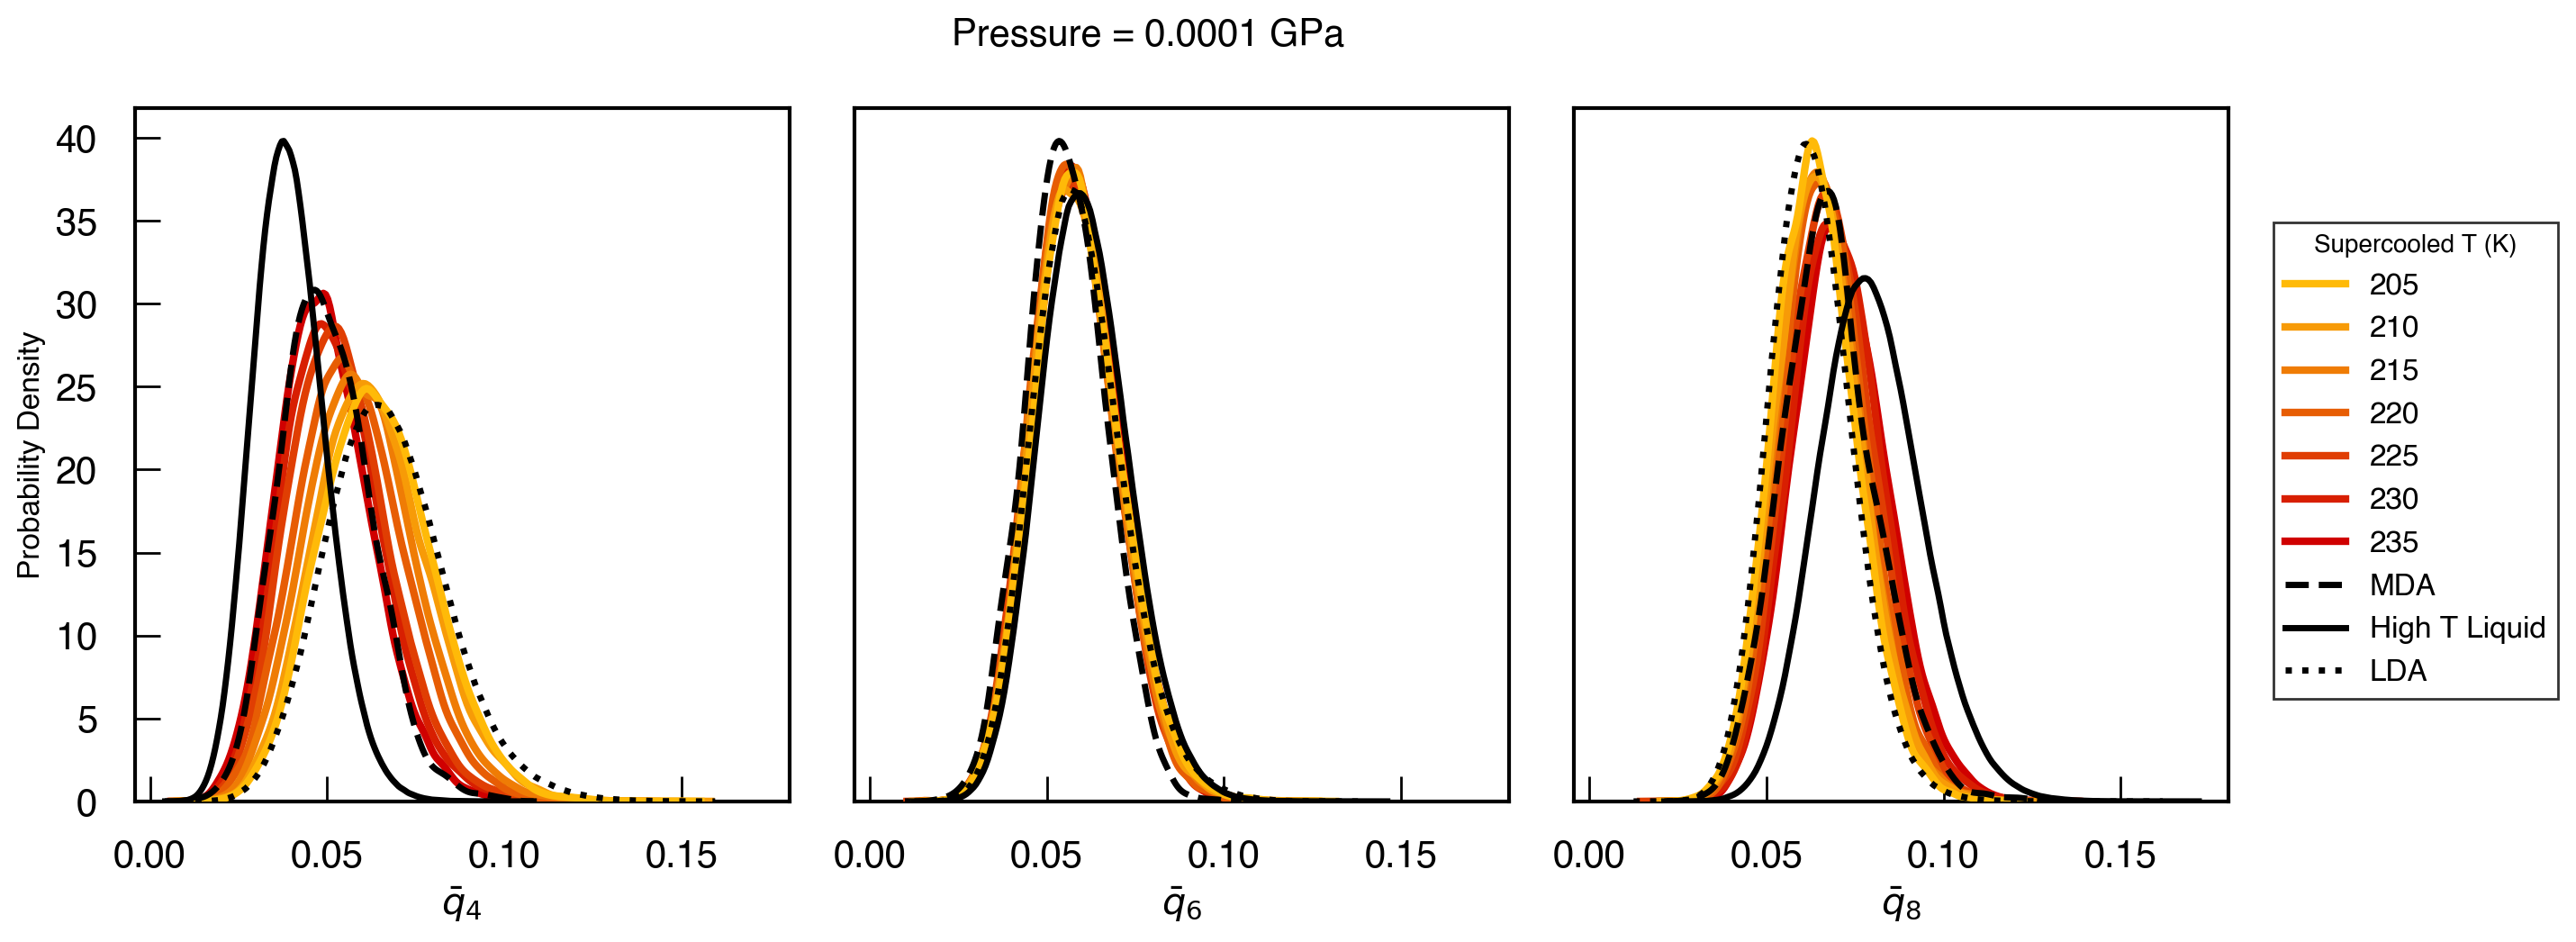

In [7]:
fig, axs = plt.subplots(1, len(desc_idx), figsize=(15, 5),sharex=True)
supercooled_labels = temps
supercooled_colours = list(colour_gradient(range(0,len(temps)), '#ffba08', '#d00000'))

desc_to_plot = ['av_q4','av_q6','av_q8']

desc_idx, feature_names = get_desc_idx_and_names(desc_to_plot)

# have the reverse order for the supercooled data

for j in range(len(desc_idx)):
    for i, label in enumerate(supercooled_steinhardt.keys()):
        sns.kdeplot(supercooled_steinhardt[label][:,desc_idx[j]], ax=axs[j], label=supercooled_labels[i], color=supercooled_colours[i][1],fill=False,linewidth=3,zorder=len(supercooled_steinhardt.keys())-i)

    sns.kdeplot(mda_steinhardt['mda'][:,desc_idx[j]], ax=axs[j], label='MDA', color='black',linewidth=2.5,linestyle='dashed', zorder=len(supercooled_steinhardt.keys())+1)
    sns.kdeplot(fausto_steinhardt['liquid'][:,desc_idx[j]], ax=axs[j], label='High T Liquid', color='black',linewidth=2.5,linestyle='solid', zorder=len(supercooled_steinhardt.keys())+1)
    sns.kdeplot(fausto_steinhardt['lda'][:,desc_idx[j]], ax=axs[j], label='LDA', color='black',linewidth=2.5,linestyle='dotted', zorder=len(supercooled_steinhardt.keys())+1)

axs[-1].legend(loc='upper left', bbox_to_anchor=(1, 0.9), ncol=1, title='Supercooled T (K)')

# reduce the space between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(len(desc_idx)):
    axs[i].set_xlabel(desc_to_plot_label_mapping[feature_names[i]], fontsize=15);
    
# remove the y ticks
for j in range(1,len(desc_idx)):
    axs[j].set_yticks([])
    axs[j].set_ylabel('')
    
axs[0].set_ylabel('Probability Density', fontsize=12)
    
# set title over the whole figure
plt.suptitle(f'Pressure = {p*10**-4} GPa', fontsize=15)
# plt.savefig(f'../figures/qbar4-6-8_distributions_supercooled_pressure{p}.png', dpi=300, bbox_inches='tight')

In [17]:
offset = -0.3 
BW_METHOD = None
x_values = np.linspace(-0.05, 0.35, 400)

In [18]:
# only getting kde for q_bar_4 for now, hence desc_idx[0]
fausto_kde = {}
for struct_type in fausto_steinhardt.keys():
    fausto_kde[struct_type] = get_kde(fausto_steinhardt[struct_type][:,desc_idx[0]], x_values, BW_METHOD)

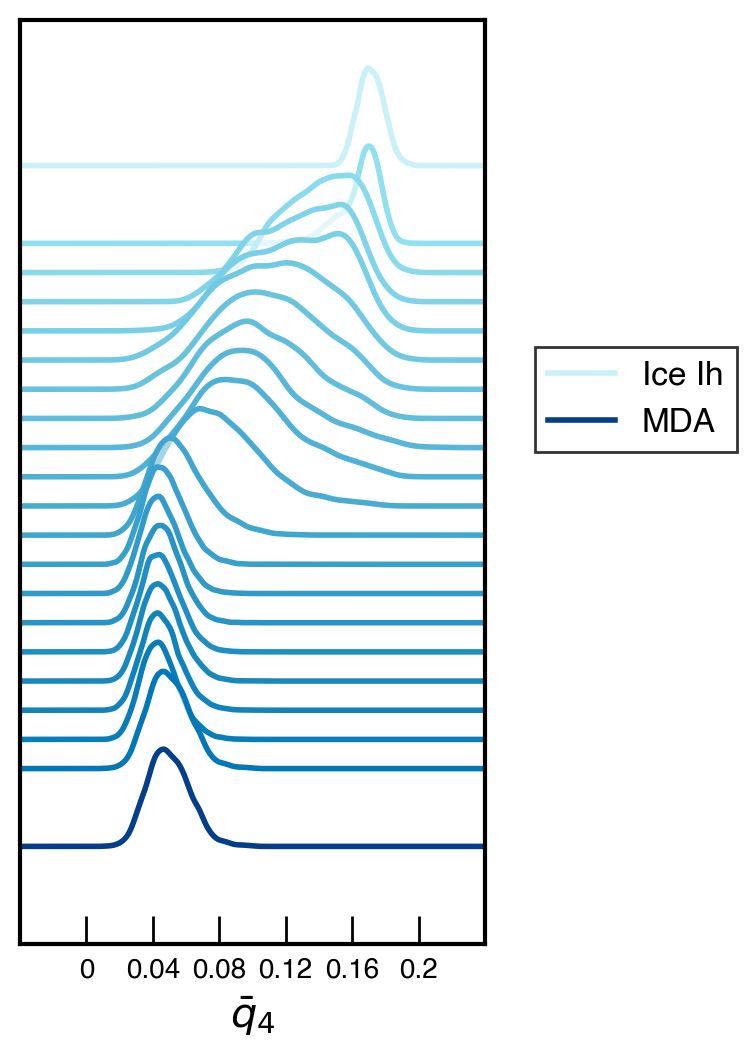

In [28]:
%config InlineBackend.figure_format = 'retina'
plt.style.use('plot.mplstyle') 
fig, axs = plt.subplots(1, 1, figsize=(3,6),sharey=True)

mda_data = prepare_shearing_data(mda_steinhardt, desc_idx[0])

# plot the Ice Ih distribution
density_estimates = get_kde(mda_data[0], x_values, BW_METHOD) + 0.5
axs.plot(x_values, density_estimates, linewidth=2, color='#caf0f8', zorder=0, label='Ice Ih')

# plot the shear distributions
for i, color in colour_gradient(range(1,len(mda_data)-1), '#90e0ef', '#0077b6'):
    density_estimates = get_kde(mda_data[i+1], x_values, BW_METHOD) + i * offset
    axs.plot(x_values, density_estimates, linewidth=2, color=color, zorder=i)
    axs.fill_between(x_values, density_estimates, i * offset, color='white', zorder=i - 0.5, alpha=0.5)

# plot the MDA distribution
density_estimates = get_kde(mda_data[-1], x_values, BW_METHOD) -6.5
axs.plot(x_values, density_estimates, linewidth=2, color='#023e8a', zorder=len(mda_data) - 1, label='MDA')
axs.set_xlabel(desc_to_plot_label_mapping[feature_names[0]], fontsize=15)

# # plot the LDA, HDA and Liquid
# for i,key in enumerate(fausto_kde.keys()):
#     axs.plot(x_values, fausto_kde[key] - 7.5, linewidth=2, color='black', label=key, linestyle=line_styles[i])

axs.set_yticks([])
axs.set_ylabel('')
axs.set_ylim([-7.5, 2])
for spine in axs.spines.values():
    spine.set_zorder(100)

axs.set_xlim([-0.04, 0.24])
axs.legend(loc='upper left', bbox_to_anchor=(1, 0.7), ncol=1)

# set the x ticks
axs.set_xticks([0, 0.04,0.08,0.12,0.16, 0.2])
axs.set_xticklabels(['0','0.04','0.08','0.12','0.16','0.2'], fontsize=10)

axs.tick_params(axis='x', which='major', pad=5)


plt.savefig(f"../figures/qbar4_shear_trajectory.pdf", dpi=300, bbox_inches="tight")

In [22]:
len(mda_data[20])

2880

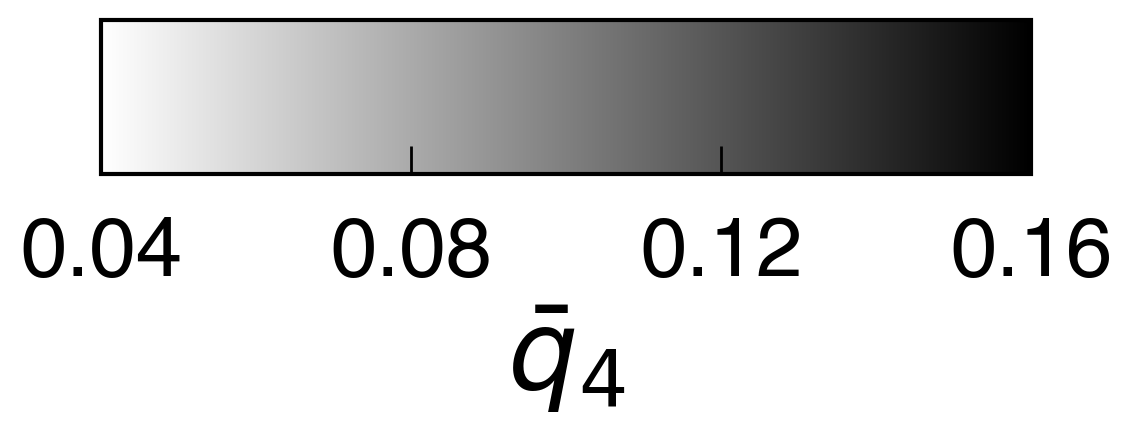

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Define the colormap with custom normalization
cmap = plt.get_cmap('gray_r')
norm = plt.Normalize(0.04, 0.16)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 1))

# Create a colorbar using the defined colormap and normalization
cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation='horizontal')


custom_ticks = [0.04,0.08,0.12,0.16]
cb.set_ticks(custom_ticks)

# Set the tick labels
cb.set_ticklabels(['0.04','0.08','0.12','0.16'],fontsize=30)
# Set the colorbar labels
cb.set_label(desc_to_plot_label_mapping[feature_names[0]], fontsize=40)

# Show the colorbar
plt.show()
